# Integradores Simplécticos

In [89]:
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from numpy.linalg import norm
%matplotlib inline

# Solución con un algoritmo de primer orden

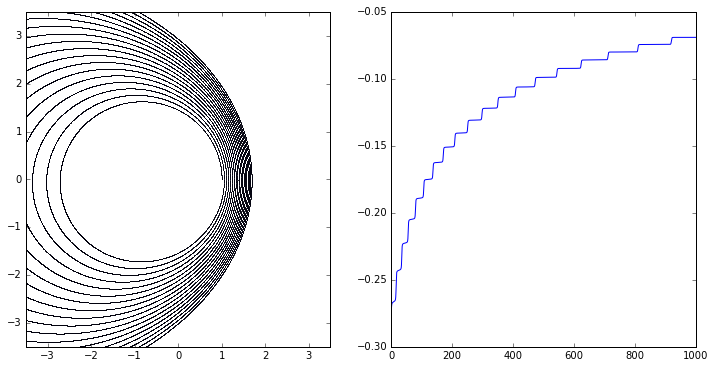

In [92]:
# Solución con un algoritmo de primer orden: Euler
dt=0.01
T=1000
Nt=int(T/dt)

ts=zeros(Nt)
rs=zeros((Nt,2))
vs=zeros((Nt,2))

rs[0]=[1,0]
vs[0]=[0,1.2]
for i in xrange(1,Nt):
    vs[i]=vs[i-1]-mu/norm(rs[i-1])**3*rs[i-1]*dt
    rs[i]=rs[i-1]+vs[i-1]*dt
    ts[i]=ts[i-1]+dt

# Gráfico
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(121)
ax1.plot(rs[:,0],rs[:,1],'o',ms=0.5)

ext=3.5
ax1.set_xlim((-ext,ext))
ax1.set_ylim((-ext,ext))

ax2=fig.add_subplot(122)
Es=[0.5*norm(v)**2-mu/norm(r) for r,v in zip(rs,vs)]
ax2.plot(ts,Es)

# Solución usando RK4

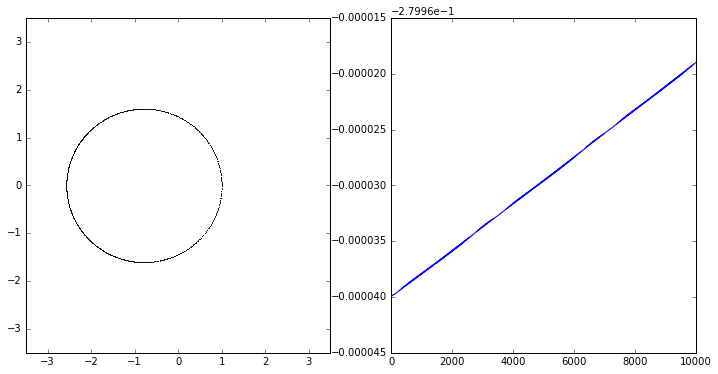

In [90]:
# Ecuacion de movimiento problema de los dos cuerpos
def eom(y,t,mu):
    r=y[:2]
    v=y[2:]
    drdt=v
    dvdt=-mu/norm(r)**3*r
    return drdt.tolist()+dvdt.tolist()

Nt=1000
ts=linspace(0,10000,Nt)
mu=1.0
r=[1,0]
v=[0,1.2]

# Soluciona el Problema
solucion=odeint(eom,r+v,ts,args=(mu,))
rs=solucion[:,:2]
vs=solucion[:,2:]

# Grafico de la solución
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(121)
ax1.plot(rs[:,0],rs[:,1],'o',ms=0.5)

ext=3.5
ax1.set_xlim((-ext,ext))
ax1.set_ylim((-ext,ext))

ax2=fig.add_subplot(122)
Es=[0.5*norm(v)**2-mu/norm(r) for r,v in zip(rs,vs)]
ax2.plot(ts,Es)

# Solución con un algoritmo de primer orden simpléctico

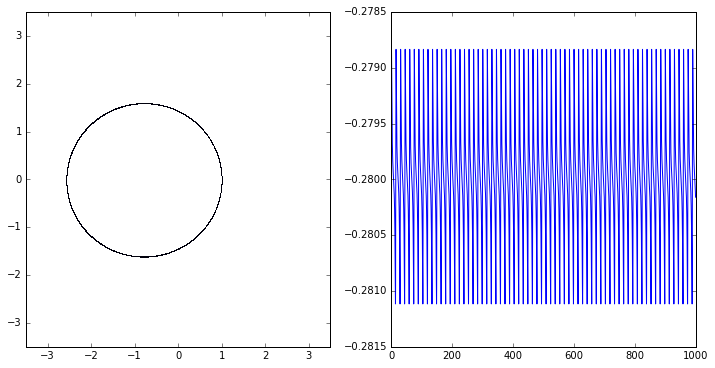

In [93]:
# Solución con un algoritmo de primer orden: leap frog
dt=0.01
T=1000
Nt=int(T/dt)

ts=zeros(Nt)
rs=zeros((Nt,2))
vs=zeros((Nt,2))

rs[0]=[1,0]
vs[0]=[0,1.2]
for i in xrange(1,Nt):
    vs[i]=vs[i-1]-mu/norm(rs[i-1])**3*rs[i-1]*dt
    rs[i]=rs[i-1]+vs[i]*dt
    ts[i]=ts[i-1]+dt

# Gráfico
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(121)
ax1.plot(rs[:,0],rs[:,1],'o',ms=0.5)

ext=3.5
ax1.set_xlim((-ext,ext))
ax1.set_ylim((-ext,ext))

ax2=fig.add_subplot(122)
Es=[0.5*norm(v)**2-mu/norm(r) for r,v in zip(rs,vs)]
ax2.plot(ts,Es)